# Simple Denoising Autoencoder (DAE) for MNIST
Paper [Here](https://www.cs.toronto.edu/~larocheh/publications/icml-2008-denoising-autoencoders.pdf)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

2026-02-17 21:32:31.300068: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-17 21:32:31.789504: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-17 21:32:34.674832: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## Preprocessing Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train.reshape(len(x_train), (x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape(len(x_test), (x_test.shape[1]*x_test.shape[2]))

In [3]:
x_train.shape

(60000, 784)

# Model

In [4]:
encoding_dim = 12

input_img = Input(shape = (784, ))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)


decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

2026-02-17 21:34:27.001242: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim, ))
decode_layer1 = autoencoder.layers[-2]
decode_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decode_layer2(decode_layer1(encoded_input)))

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = autoencoder.fit(
    x_train,
    x_train,
    epochs=5,
    validation_data=(x_test, x_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0115 - loss: 0.1561 - val_accuracy: 0.0099 - val_loss: 0.1273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0121 - loss: 0.1246 - val_accuracy: 0.0090 - val_loss: 0.1201
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0122 - loss: 0.1191 - val_accuracy: 0.0115 - val_loss: 0.1165
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0123 - loss: 0.1159 - val_accuracy: 0.0124 - val_loss: 0.1136
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0125 - loss: 0.1137 - val_accuracy: 0.0144 - val_loss: 0.1122


In [9]:
encoded_images = encoder.predict(x_test)
encoded_images.shape
predicted = decoder.predict(encoded_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Plot Encoding

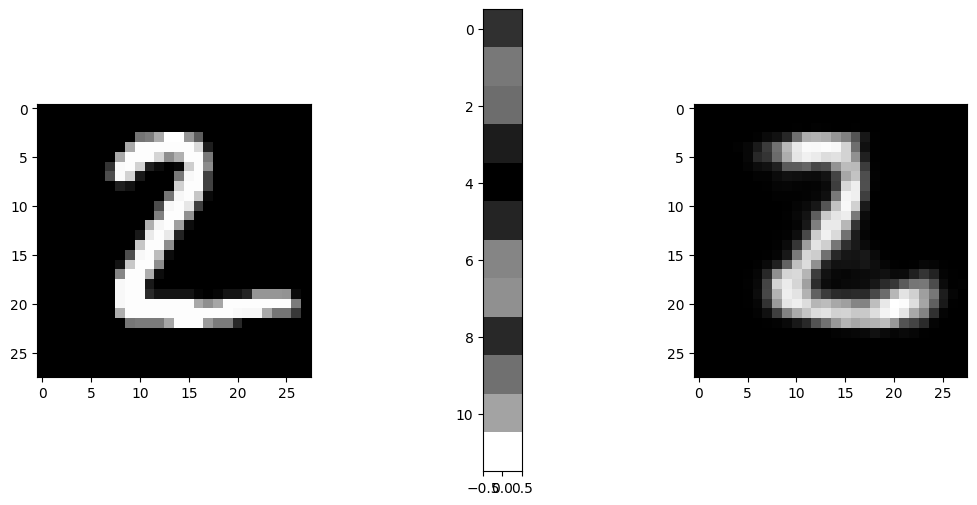

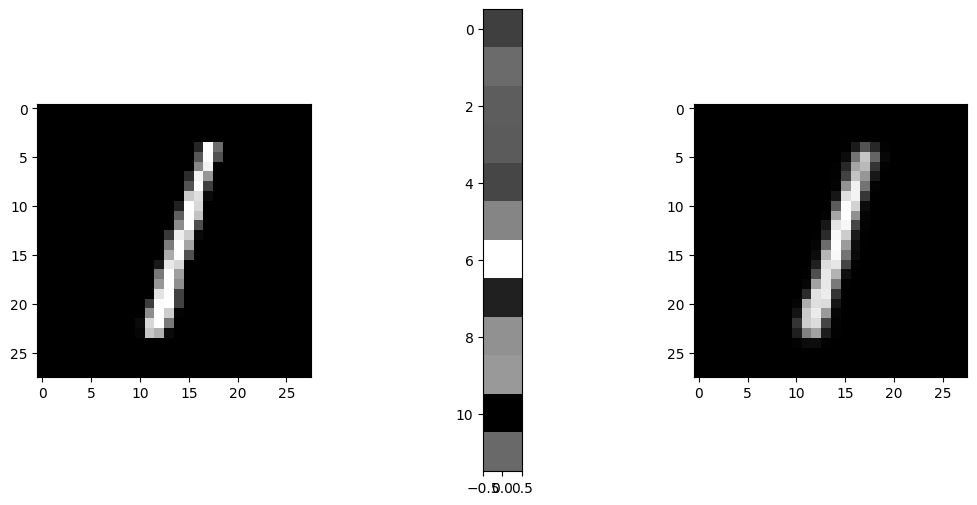

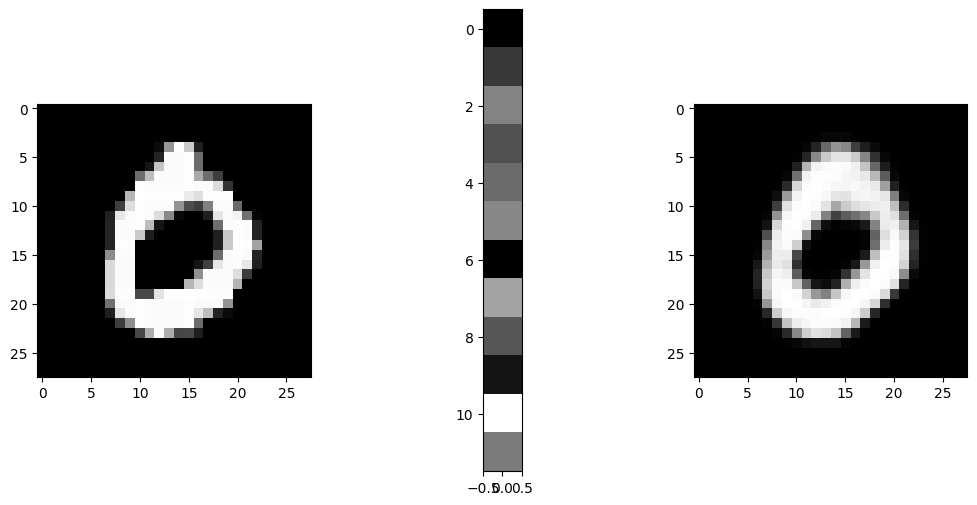

In [10]:
def plot_imgs(index=0):
  f = plt.figure(figsize=(12, 6))
  f.add_subplot(1,3, 1)
  plt.imshow(x_test[index].reshape(28, 28), cmap="gray")
  f.add_subplot(1,3, 2)
  plt.imshow(encoded_images[index].reshape(-1, 1), cmap="gray")
  f.add_subplot(1,3, 3)
  plt.imshow(predicted[index].reshape(28, 28), cmap="gray")
  plt.show(block=True)

plot_imgs(1)
plot_imgs(2)
plot_imgs(3)

# Denoising Example

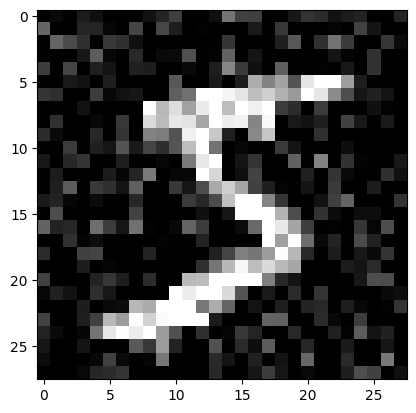

In [11]:
noise_factor = 0.2

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.imshow(x_train_noisy[0].reshape(28, 28), cmap="gray")

# Model

In [12]:
input_img = Input(shape = (784, ))
d_encoded = Dense(128, activation='relu')(input_img)
d_encoded = Dense(encoding_dim, activation='relu')(d_encoded)
d_decoded = Dense(128, activation='relu')(d_encoded)
d_decoded = Dense(784, activation='sigmoid')(d_decoded)

d_autoencoder = Model(input_img, d_decoded)
d_encoder = Model(input_img, d_encoded)
d_encoded_input = Input(shape=(encoding_dim, ))
d_decode_layer1 = d_autoencoder.layers[-2]
d_decode_layer2 = d_autoencoder.layers[-1]
d_decoder = Model(
    d_encoded_input,
    d_decode_layer2(d_decode_layer1(d_encoded_input)))

In [13]:
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = d_autoencoder.fit(
    x_train_noisy,
    x_train,
    epochs=5,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0130 - loss: 0.1736 - val_accuracy: 0.0122 - val_loss: 0.1441
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0122 - loss: 0.1408 - val_accuracy: 0.0127 - val_loss: 0.1361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0111 - loss: 0.1351 - val_accuracy: 0.0109 - val_loss: 0.1322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0109 - loss: 0.1315 - val_accuracy: 0.0119 - val_loss: 0.1290
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0110 - loss: 0.1292 - val_accuracy: 0.0119 - val_loss: 0.1276


In [14]:
encoded_images = d_encoder.predict(x_test_noisy)
reconstruct = d_decoder.predict(encoded_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


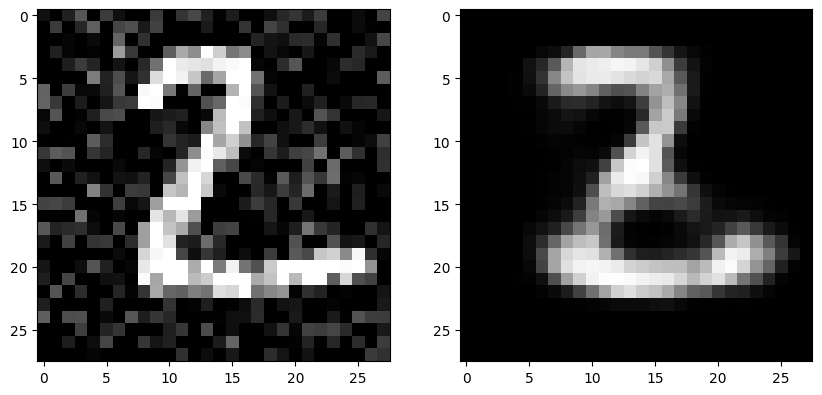

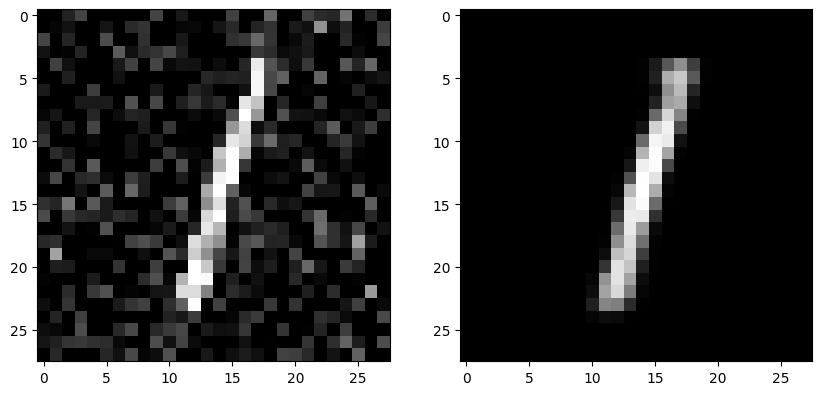

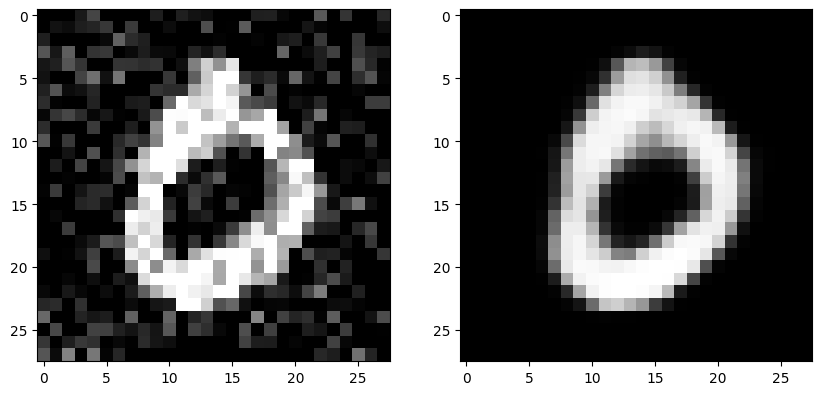

In [15]:

def plot_imgs_for_cnn_noisy(index=0):
  f = plt.figure(figsize=(10, 10))
  f.add_subplot(1,2, 1)
  plt.imshow(x_test_noisy[index].reshape(28, 28), cmap="gray")


  f.add_subplot(1,2, 2)
  plt.imshow(reconstruct[index].reshape(28,28), cmap="gray")

plot_imgs_for_cnn_noisy(1)
plot_imgs_for_cnn_noisy(2)
plot_imgs_for_cnn_noisy(3)


# Activity

1. Create a DAE for **CIFAR10** Dataset using Convolutional Layers
2. Try using *Mean Squared Error (MSE)* as Loss Function for Training
3. Compare Results with *Binary Cross-entropy* and *MSE* loss functions
4. Improve the model and test with **Noise ratios of: [0.2, 0.5, 0.8]**
   1. Add more epochs
   2. More layers/neurons
   3. Add Data Augmentation
   4. Change Encoding Dim

**This activity is in Teams!**